In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
dataset['Item_Fat_Content']=dataset['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

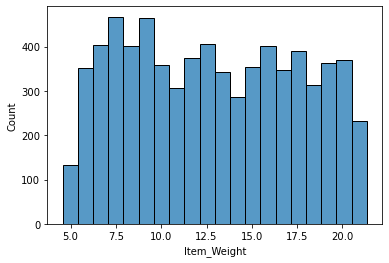

In [5]:
sns.histplot(x='Item_Weight', data=dataset)

In [6]:
dataset['Item_Weight'].replace(np.nan,np.median(dataset['Item_Weight']), inplace=True)

In [7]:
dataset['Outlet_Size'].replace(np.nan,'Medium', inplace=True)

In [8]:
dataset['Item_Type_Overall']=dataset['Item_Identifier'].apply(lambda x:x[0:2])

In [9]:
dataset['Item_Type_Overall']=dataset['Item_Type_Overall'].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})

In [10]:
dataset['Outlet_Years']=2021-dataset['Outlet_Establishment_Year']
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Overall,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,34


In [11]:
dataset.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True)
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Overall,Outlet_Years
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,22
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,12
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,22
3,19.20,Regular,0.000000,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,23
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,34


In [12]:
dataset['Item_Type_Overall'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Overall, dtype: int64

In [13]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
dataset['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [15]:
outlet_identifier=pd.get_dummies(dataset['Outlet_Identifier'])
outlet_identifier=pd.DataFrame(outlet_identifier)
outlet_identifier

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0
8519,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,1,0,0,0,0,0,0


In [16]:
dataset=pd.concat((dataset,outlet_identifier), axis=1)
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Overall,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,...,0,0,0,0,0,0,0,0,0,1
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,...,0,0,0,1,0,0,0,0,0,0
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,...,0,0,0,0,0,0,0,0,0,1
3,19.20,Regular,0.000000,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,...,1,0,0,0,0,0,0,0,0,0
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,...,0,1,0,0,0,0,0,0,0,0


In [17]:
dataset.drop(['OUT027','OUT013','OUT035','OUT045','OUT046','OUT049','OUT018','OUT017'], axis=1,inplace=True)

In [18]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Overall,Outlet_Years,OUT010,OUT019
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,22,0,0
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,12,0,0
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,22,0,0
3,19.20,Regular,0.000000,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,23,1,0
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,34,0,0


In [19]:
dataset.drop('Outlet_Identifier', axis=1,inplace=True)

In [20]:
dataset['Outlet_Years'].value_counts()

36    1463
34     932
22     930
17     930
24     930
19     929
12     928
14     926
23     555
Name: Outlet_Years, dtype: int64

In [21]:
dataset['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
dataset['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [23]:
dataset['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [24]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Overall,Outlet_Years,OUT010,OUT019
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food,22,0,0
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,12,0,0
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food,22,0,0
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,Food,23,1,0
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,34,0,0


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Size           8523 non-null   object 
 5   Outlet_Location_Type  8523 non-null   object 
 6   Outlet_Type           8523 non-null   object 
 7   Item_Outlet_Sales     8523 non-null   float64
 8   Item_Type_Overall     8523 non-null   object 
 9   Outlet_Years          8523 non-null   int64  
 10  OUT010                8523 non-null   uint8  
 11  OUT019                8523 non-null   uint8  
dtypes: float64(4), int64(1), object(5), uint8(2)
memory usage: 682.6+ KB


In [26]:
dataset=pd.get_dummies(dataset, columns=['Item_Fat_Content','Item_Type_Overall','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [27]:
dataset.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,OUT010,OUT019,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Overall_Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,22,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,12,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,22,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,23,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,34,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [28]:
dataset['Item_Weight'].replace(np.nan,np.mean(dataset['Item_Weight']), inplace=True)

In [29]:
X = dataset.drop("Item_Outlet_Sales",axis=1)
y = dataset["Item_Outlet_Sales"]

In [30]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,y)
mutual_info

array([7.55012057e-02, 8.39815753e-02, 7.63654858e-01, 1.56936787e-01,
       9.72339395e-02, 1.01381383e-01, 2.70144512e-02, 3.13967132e-02,
       1.81453164e-02, 2.55035404e-02, 1.23091235e-02, 1.37693427e-03,
       0.00000000e+00, 1.16702579e-04, 1.64238565e-02, 2.39676563e-02,
       4.16325982e-03, 2.31758871e-01, 8.47912411e-02, 9.90392867e-03,
       5.32083819e-02])

In [31]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Item_MRP                            0.763655
Outlet_Type_Grocery Store           0.231759
Outlet_Years                        0.156937
OUT019                              0.101381
OUT010                              0.097234
Outlet_Type_Supermarket Type1       0.084791
Item_Visibility                     0.083982
Item_Weight                         0.075501
Outlet_Type_Supermarket Type3       0.053208
Item_Fat_Content_Regular            0.031397
Item_Fat_Content_Low Fat            0.027014
Item_Type_Overall_Food              0.025504
Outlet_Location_Type_Tier 2         0.023968
Item_Type_Overall_Drinks            0.018145
Outlet_Location_Type_Tier 1         0.016424
Item_Type_Overall_Non-Consumable    0.012309
Outlet_Type_Supermarket Type2       0.009904
Outlet_Location_Type_Tier 3         0.004163
Outlet_Size_High                    0.001377
Outlet_Size_Small                   0.000117
Outlet_Size_Medium                  0.000000
dtype: float64

In [32]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,OUT010,OUT019,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Overall_Drinks,Item_Type_Overall_Food,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,22,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,12,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,22,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,23,1,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,34,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [33]:
X.drop(['Outlet_Location_Type_Tier 2',
'Item_Fat_Content_Low Fat',
'Item_Fat_Content_Regular',
'Item_Type_Overall_Food',
'Item_Type_Overall_Drinks',
'Outlet_Location_Type_Tier 1',
'Item_Type_Overall_Non-Consumable',
'Outlet_Size_Small',
'Outlet_Location_Type_Tier 3',
'Outlet_Type_Supermarket Type2',
'Outlet_Size_High',
'Outlet_Size_Medium','Item_Weight','Outlet_Type_Supermarket Type3'], axis=1, inplace=True)

In [34]:
X.head()

,Item_Visibility,Item_MRP,Outlet_Years,OUT010,OUT019,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1
0,0.016047,249.8092,22,0,0,0,1
1,0.019278,48.2692,12,0,0,0,0
2,0.016760,141.6180,22,0,0,0,1
3,0.000000,182.0950,23,1,0,1,0
4,0.000000,53.8614,34,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((5966, 7), (2557, 7))

<Figure size 864x720 with 0 Axes>

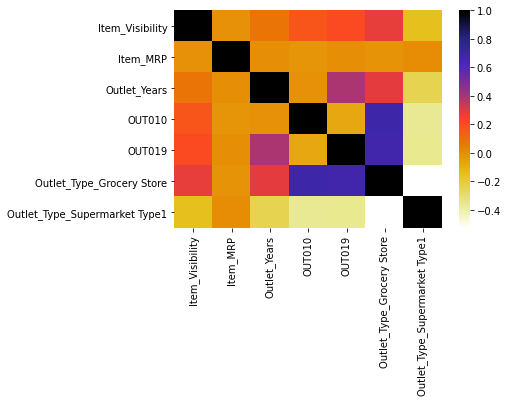

<Figure size 864x720 with 0 Axes>

In [36]:
corr=X_train.corr()
sns.heatmap(corr,cmap=plt.cm.CMRmap_r)
plt.figure(figsize=(12,10))

In [37]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X_train, 0.60)
corr_features

{'Outlet_Type_Grocery Store'}

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [41]:
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1162.182227761603


In [42]:
#RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50,100,150,200,250,300]
max_features = ['auto', 'sqrt','log2']
max_depth = [2,4,6,8,10]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [43]:
rf_randomcv=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=100, verbose=2)

In [44]:
rf_randomcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 6}

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'max_depth': [6], 'max_features': ['auto'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [100, 200, 300, 400, 500]}


In [46]:
grid_search=GridSearchCV(estimator=regressor,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   40.8s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6], 'max_features': ['auto'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [47]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=6, min_samples_leaf=12, min_samples_split=3)

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor =RandomForestRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=4,
                      n_estimators=200)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1109.9580903824738
